In [1]:
!nvidia-smi

Mon Jun  7 21:53:11 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os, shutil
from glob import glob

In [4]:
from google.colab import drive
drive.mount('/content/grive')

Drive already mounted at /content/grive; to attempt to forcibly remount, call drive.mount("/content/grive", force_remount=True).


In [5]:
import cv2
from keras.preprocessing.image import ImageDataGenerator

# Preprocessing images

In [6]:
image_gen = ImageDataGenerator(rescale=1./255)

In [9]:
train_dir = '/content/grive/MyDrive/smalldataset/train'
val_dir = '/content/grive/MyDrive/smalldataset/validation'
test_dir = '/content/grive/MyDrive/smalldataset/test'

In [10]:
batch_size = 80
train_generator = image_gen.flow_from_directory(train_dir,
                                          target_size=(150,150),
                                          batch_size=batch_size,
                                          seed=42,
                                          shuffle=False,
                                          class_mode='categorical')
val_generator = image_gen.flow_from_directory(val_dir,
                                        target_size=(150,150),
                                        batch_size=batch_size,
                                        seed=42,
                                        shuffle=False,
                                        class_mode='categorical')
test_generator = image_gen.flow_from_directory(test_dir,
                                        target_size=(150,150),
                                        batch_size=batch_size,
                                        seed=42,
                                        shuffle=False,
                                        class_mode='categorical')

Found 2999 images belonging to 3 classes.
Found 1500 images belonging to 3 classes.
Found 1500 images belonging to 3 classes.


# Building CNN Model

In [11]:
from keras.applications import vgg19
from keras.models import Sequential, Model, load_model
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from keras import optimizers
from keras.callbacks import ModelCheckpoint


In [15]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(150,150,3), activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64, (3,3),activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(128, (3,3),activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(128, (3,3),activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [17]:
result = model.fit_generator(train_generator, 
                             validation_data=val_generator,
                             epochs=10,
                             steps_per_epoch=(len(train_generator.labels)/80),
                             validation_steps=(len(val_generator.labels)/80)
                             )

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
37/37 [==============================] - 1237s 32s/step - loss: 1.4144 - accuracy: 0.2122 - val_loss: 0.9993 - val_accuracy: 0.3653
Epoch 2/10
37/37 [==============================] - 38s 1s/step - loss: 1.0109 - accuracy: 0.4559 - val_loss: 0.9868 - val_accuracy: 0.4507
Epoch 3/10
37/37 [==============================] - 38s 1s/step - loss: 0.7467 - accuracy: 0.7144 - val_loss: 0.3163 - val_accuracy: 0.8747
Epoch 4/10
37/37 [==============================] - 39s 1s/step - loss: 0.2772 - accuracy: 0.9010 - val_loss: 0.3283 - val_accuracy: 0.9113
Epoch 5/10
37/37 [==============================] - 39s 1s/step - loss: 0.2570 - accuracy: 0.9255 - val_loss: 0.3518 - val_accuracy: 0.8720
Epoch 6/10
37/37 [==============================] - 38s 1s/step - loss: 0.2195 - accuracy: 0.9291 - val_loss: 0.1740 - val_accuracy: 0.9440
Epoch 7/10
37/37 [==============================] - 38s 1s/step - loss: 0.1766 - accuracy: 0.9437 - val_loss: 0.2098 - val_accuracy: 0.9187
Epoch 8/10
37/37 

In [31]:
model.save('multiclass_baseline.h5')

# Evaluation on model

In [18]:
result.history['accuracy']

[0.20506834983825684,
 0.4748249351978302,
 0.7929309606552124,
 0.8759586811065674,
 0.9216405749320984,
 0.9223074316978455,
 0.9329776763916016,
 0.9179726839065552,
 0.9449816346168518,
 0.9569856524467468]

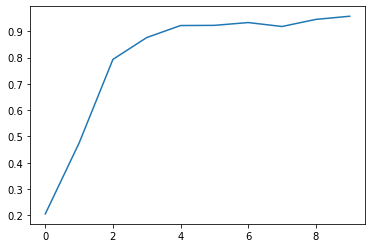

In [19]:
plt.plot(result.history['accuracy'])

In [30]:
result.history['val_accuracy']

[0.36533331871032715,
 0.4506666660308838,
 0.874666690826416,
 0.9113333225250244,
 0.871999979019165,
 0.9440000057220459,
 0.918666660785675,
 0.9313333630561829,
 0.9386666417121887,
 0.9626666903495789]

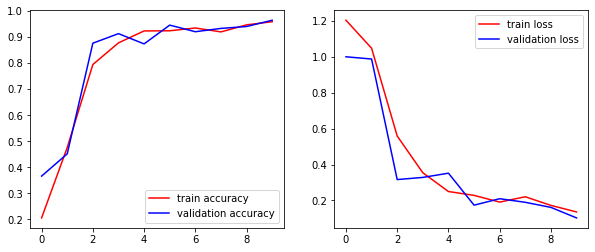

In [20]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)

plt.plot(result.history['accuracy'], label='train accuracy', color='red')
plt.plot(result.history['val_accuracy'], label='validation accuracy', color='blue')
plt.legend()

plt.subplot(1,2,2)
plt.plot(result.history['loss'], label='train loss', color='red')
plt.plot(result.history['val_loss'], label='validation loss', color='blue')
plt.legend()

plt.show()

In [21]:
from sklearn.metrics import confusion_matrix, classification_report

In [22]:
prediction = model.predict_classes(test_generator)
y_true = test_generator.labels

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [23]:
train_generator.class_indices

{'IncorrectMask': 0, 'WithMask': 1, 'WithoutMask': 2}

In [24]:
confusion_matrix(y_true, prediction)

array([[496,   3,   1],
       [  6, 466,  28],
       [  0,  12, 488]])

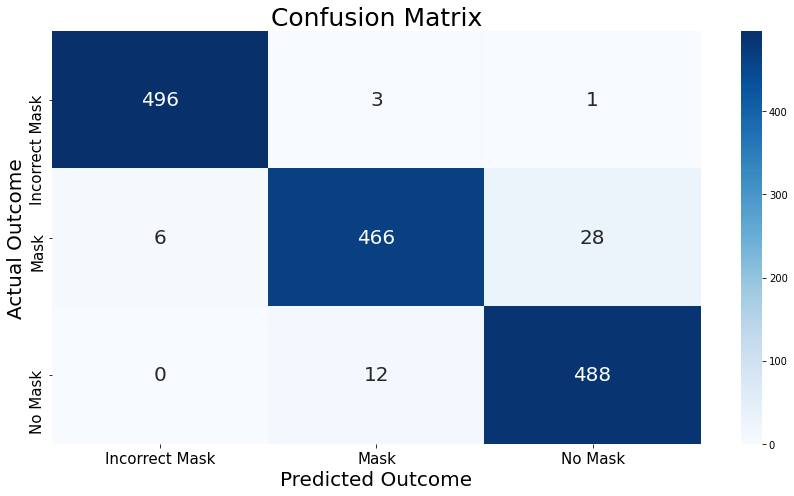

In [29]:
plt.figure(figsize=(35,7))
plt.subplot(131)
ax = sns.heatmap(confusion_matrix(test_generator.labels, prediction.round()),
            annot = True, annot_kws={"size":20}, fmt="d",cmap = "Blues")
# cmlabels = ['True Negatives', "False Positives",
#                'Flase Negatives', "True Positives"]
# for i,t in enumerate(ax.texts):
#   t.set_text(t.get_text() + "\n" + cmlabels[i])
plt.title('Confusion Matrix', size=25)
plt.xlabel('Predicted Outcome', size=20)
plt.ylabel('Actual Outcome', size=20)
labels = ['Incorrect Mask', 'Mask', 'No Mask']
ax.set_xticklabels(labels, size=15)
ax.set_yticklabels(labels, size=15)
plt.tight_layout()
plt.show();

In [26]:
print(classification_report(y_true, prediction))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       500
           1       0.97      0.93      0.95       500
           2       0.94      0.98      0.96       500

    accuracy                           0.97      1500
   macro avg       0.97      0.97      0.97      1500
weighted avg       0.97      0.97      0.97      1500

